In [10]:
Baixando o dataset Labelde Faces in Wild.
Escolhendo uma face com pelo menos 100 imagens.
Camando numpy.zeros() para criar um tensor float64 de 250 x 250 x 3 para armazenar o resultado.
Lendo cada imagem com cv2.imread.
Convertendo para float e acumulando.
Computando a imagem média de um conjunto de faces.
Salvando o resultado médio com cv2.imwrite.

SyntaxError: invalid syntax (2720312612.py, line 1)

In [ ]:
pip install scikit-learn opencv-python numpy


Exibindo uma imagem de amostra de George W Bush (deve ser colorida):


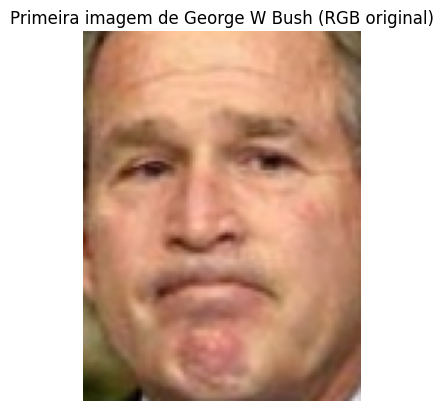

Processando imagens para calcular a média...
Imagem média gerada e salva como 'media_bush.jpg'


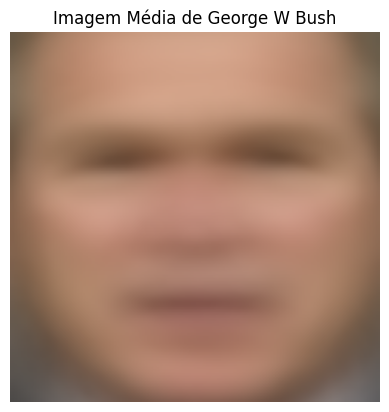

In [26]:
import numpy as np # Importa a biblioteca NumPy para operações numéricas e com arrays
import cv2 # Importa a biblioteca OpenCV para processamento de imagens
from sklearn.datasets import fetch_lfw_people # Importa a função para baixar o dataset Labeled Faces in the Wild
import matplotlib.pyplot as plt # Importa a biblioteca Matplotlib para exibir imagens e gráficos

# 1. Baixar o dataset Labeled Faces in the Wild (LFW)
#    - min_faces_per_person=100: Garante que sejam baixadas apenas pessoas com no mínimo 100 fotos.
#    - resize=1.0: Mantém o tamanho original das imagens.
#    - color=True: Garante que as imagens sejam carregadas em cores (RGB).
#    As imagens do dataset LFW são geralmente retornadas como arrays float32,
#    com valores de pixel normalizados entre 0.0 (preto) e 1.0 (máxima intensidade de cor).
lfw = fetch_lfw_people(min_faces_per_person=100, resize=1.0, color=True)

# 2. Selecionar a pessoa específica para o cálculo da média
nome_pessoa = "George W Bush" # Define o nome da pessoa desejada
# Encontra o índice correspondente ao nome da pessoa na lista de nomes do dataset
indice_pessoa = list(lfw.target_names).index(nome_pessoa)

# 3. Filtrar apenas as imagens da pessoa selecionada
#    'lfw.images' contém todas as imagens do dataset.
#    'lfw.target' contém os rótulos (índices) de qual pessoa cada imagem pertence.
#    Filtramos as imagens onde o rótulo corresponde ao índice da pessoa escolhida.
imagens_rgb_float = lfw.images[lfw.target == indice_pessoa] # Estas imagens já estão no formato RGB (float32, 0.0-1.0)

# Exibir uma imagem de amostra para verificar se está tudo ok e não preta inicialmente.
# Para exibir com matplotlib, se os valores estão entre 0.0-1.0, é bom multiplicá-los por 255
# e convertê-los para uint8, pois matplotlib.pyplot.imshow espera valores 0-255 para uint8.
print(f"Exibindo uma imagem de amostra de {nome_pessoa} (deve ser colorida):")
plt.imshow((imagens_rgb_float[0] * 255).astype(np.uint8))
plt.title(f"Primeira imagem de {nome_pessoa} (RGB original)")
plt.axis('off') # Remove os eixos da imagem para uma visualização mais limpa
plt.show() # Mostra a janela da imagem

# 4. Criar um "acumulador" (tensor) para somar os valores de pixel de todas as imagens.
#    Será um array de zeros com o tamanho final desejado da imagem média (250x250 pixels com 3 canais de cor).
#    Usamos float64 para garantir a precisão máxima durante a soma, pois estamos lidando com médias.
acumulador = np.zeros((250, 250, 3), dtype=np.float64)
contador_imagens = 0 # Inicializa um contador para saber quantas imagens foram processadas

# 5. Redimensionar e acumular as imagens diretamente da memória.
#    Não precisamos salvar e recarregar os arquivos, o que simplifica o processo
#    e evita problemas de conversão RGB/BGR ao lidar com arquivos.
print("Processando imagens para calcular a média...")
for imagem_rgb_original in imagens_rgb_float: # Itera sobre cada imagem da pessoa filtrada
    # Garante que a imagem esteja em float64 para a acumulação (valores ainda 0.0-1.0)
    imagem_float_para_redimensionar = imagem_rgb_original.astype(np.float64)

    # Redimensiona a imagem para 250x250 pixels.
    # Como já está em RGB e float64, cv2.resize funciona corretamente.
    imagem_redimensionada_rgb = cv2.resize(imagem_float_para_redimensionar, (250, 250))

    # Soma a imagem redimensionada ao acumulador.
    # Os valores no acumulador agora são a soma dos pixels (ainda na escala 0.0-1.0, mas somados).
    acumulador += imagem_redimensionada_rgb
    contador_imagens += 1 # Incrementa o contador para cada imagem processada

# Verifica se alguma imagem foi realmente processada antes de calcular a média.
if contador_imagens == 0:
    print("Erro: Nenhuma imagem foi processada. A imagem média não pode ser gerada.")
else:
    # 6. Calcular a imagem média final.
    #    Divide a soma total dos pixels pelo número de imagens para obter a média.
    #    Os valores resultantes ainda estarão na escala de 0.0 a 1.0.
    imagem_media_rgb_float = acumulador / contador_imagens

    # --- ESTA É A MUDANÇA CRUCIAL PARA EVITAR A IMAGEM PRETA ---
    # 7. Escalar os valores de 0.0-1.0 para o intervalo 0-255 e converter para uint8.
    #    - Multiplica por 255: Converte a escala de 0.0-1.0 para 0-255.
    #    - np.clip(..., 0, 255): Garante que todos os valores fiquem estritamente
    #      entre 0 e 255, útil para evitar problemas com arredondamento de ponto flutuante.
    #    - .astype(np.uint8): Converte o array de volta para o tipo de dado inteiro de 8 bits,
    #      que é o formato padrão para imagens em muitas bibliotecas e para salvamento.
    imagem_media_rgb_uint8 = np.clip(imagem_media_rgb_float * 255, 0, 255).astype(np.uint8)

    # 8. Salvar a imagem média no disco.
    #    - final_output_path: Define o nome do arquivo de saída.
    #    - cv2.cvtColor(..., cv2.COLOR_RGB2BGR): O OpenCV (cv2) espera imagens no formato BGR
    #      (Azul, Verde, Vermelho) para operações como salvar. Como nossa imagem
    #      média está em RGB (Vermelho, Verde, Azul), precisamos convertê-la antes de salvar.
    caminho_saida_final = "media_bush.jpg"
    cv2.imwrite(caminho_saida_final, cv2.cvtColor(imagem_media_rgb_uint8, cv2.COLOR_RGB2BGR))

    print(f"Imagem média gerada e salva como '{caminho_saida_final}'")

    # Exibir a imagem média final usando matplotlib para visualização imediata.
    # matplotlib.pyplot.imshow já espera RGB por padrão, e nosso 'average_img_rgb_uint8' já está em RGB (e uint8).
    plt.imshow(imagem_media_rgb_uint8)
    plt.title(f"Imagem Média de {nome_pessoa}")
    plt.axis('off') # Remove os eixos
    plt.show() # Mostra a janela da imagem